# Biological Signals Analysis - Week 4 Exercise

### Created by Guy Singer | Jan. 31, 2024

### Table of Contents:
- Images as Arrays
- Convolving Images With a Filter

## Images as Arrays <a id="ims-as-arrays" ></a>

A digital image, in its simplest form, is a matrix of pixel values. Each pixel represents the smallest unit of an image, holding a value that corresponds to its intensity or color. In grayscale images, each pixel is usually represented by a single value, indicating various shades of gray. Color images typically use a combination of red, green, and blue (RGB) values for each pixel.

Many Python libraries, such as `skimage` (Scikit-Image), provide an easy way to handle and process these images. Let's take a microscopy image as an example:

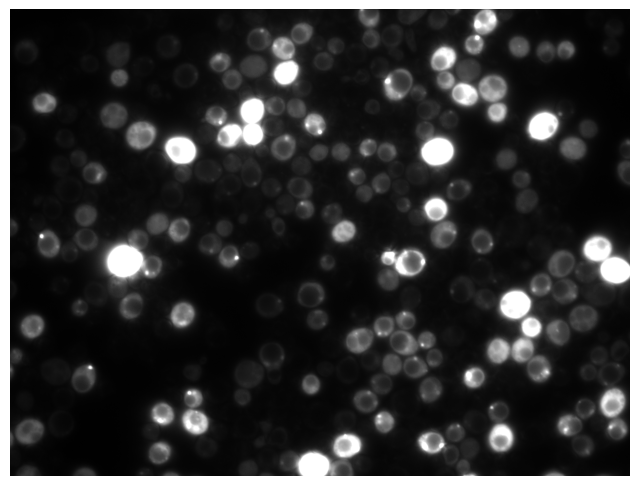

Array Representation of the Image:
[[219 225 220 ... 256 258 272]
 [218 211 217 ... 270 268 278]
 [217 217 214 ... 263 268 262]
 ...
 [337 343 321 ... 266 287 285]
 [320 323 339 ... 268 295 281]
 [329 353 335 ... 276 281 291]]

Shape of the Image Array: (1024, 1360)


In [3]:
import skimage.io
import matplotlib.pyplot as plt

# Load the image
image_url = 'https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif'
image = skimage.io.imread(image_url)

# Visualizing the image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Displaying the array structure of the image
print("Array Representation of the Image:")
print(image)
print("\nShape of the Image Array:", image.shape)


We can see that the image we see as an image is simply an array of values. For grayscale images these values will be between 0 and 255. For RGB images, there will be three dimensions of the array, each containing pixel values between 0 and 255.

## Convolution in Mathematics vs Image Processing <a id="convolutions-on-images" ></a>

### Mathematical Convolution

As we discussed last week, in mathematics, convolution is an operation that combines two functions into a third function. It represents the amount of overlap of one function as it is shifted over another.

For two continuous functions $ f $ and $ g $, convolution is defined as:

$ (f * g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t - \tau) d\tau $

In the discrete case, typically used in digital signal processing, the formula becomes:

$ (f * g)[n] = \sum_{m=-\infty}^{\infty} f[m]g[n - m] $

Mathematical convolution is commutative, associative, and distributive over addition. This means the order of the functions does not change the result, allowing for flexible application in various contexts.

### Convolution in Image Processing

In image processing, convolution is a critical technique used for applying filters to images, such as for blurring, sharpening, or edge detection.
Convolution in image processing involves sliding a kernel (or filter) over the image, and performing pixel-wise multiplication and summing the results. Unlike mathematical convolution, the kernel is typically not reversed.

The adapted convolution formula for image processing is:

$ C(i, j) = \sum_{u=-k}^{k} \sum_{v=-k}^{k} I(i+u, j+v) \cdot K(u, v) $

Here, $ I $ represents the image, $ K $ is the kernel, and $ C $ is the convolved image.

### Key Differences

- **Kernel Flipping**: Unlike mathematical convolution, the kernel in image processing is not flipped before application.
- **Boundary Handling**: Image processing convolution must address boundary conditions, often through strategies like padding.
- **Purpose and Application**: While mathematical convolution is more abstract, convolution in image processing is applied for practical image manipulations, such as filtering and feature extraction.

## Convolving Images With a Filter <a id="convolved-filters" ></a>

# Convolving a Filter on an Image

Convolution is a fundamental operation in image processing that involves applying a filter (also known as a kernel) to an image. It is used for various purposes such as blurring, sharpening, edge detection, and more.

### The Convolution Operation
As a reminder from last week, we mathematically define convolution as the process of adding each element of the image to its local neighbors, weighted by the kernel. For a 2D image `I` and a kernel `K`, the convolution `C` at each pixel `(i, j)` is defined as:

$ C(i, j) = \sum_{u=-k}^{k} \sum_{v=-k}^{k} I(i+u, j+v) \cdot K(u, v) $

where `I(i+u, j+v)` is the pixel value of the image and `K(u, v)` is the kernel value at position `(u, v)`. The size of the kernel `(2k+1) x (2k+1)` determines how many neighbors of each pixel are considered in the convolution.

## Gaussian Filter
A Gaussian filter is a widely used filter in image processing, known for its properties in reducing image noise and smoothing details.

### Gaussian Filter Explained
The Gaussian filter is based on the Gaussian (normal) distribution. In a 2D Gaussian filter, the kernel values are calculated using the Gaussian function:

\[ G(x, y) = \frac{1}{2 \pi \sigma^2} e^{- \frac{x^2 + y^2}{2 \sigma^2}} \]

where `x` and `y` are distances from the origin in the horizontal and vertical axes, and `σ` is the standard deviation of the Gaussian distribution. The values of the Gaussian filter add up to 1, ensuring that the overall brightness of the image remains constant after filtering.

## Applying Gaussian Filter to a Microscopy Image
Let's apply a Gaussian filter to the provided microscopy image and observe the effects. We will visualize both the original and the filtered image to compare them.
